# Data merging
The data for this project consists of open source data provided by [Sensor Community](https://sensor.community/en/) and [Deutscher Wetterdienst](https://opendata.dwd.de/climate_environment/CDC/observations_germany/). We focus on the following sensor positions and time spans:
| city | mean PM pollution of today | longitude | latitude | time span |
|---|---|---|---|---|
| Bremen   | homogeneous, low  | 8.670000 - 8.933400 | 53.013000 - 53.145600 | Jan 20 - Feb 22 | 
| Frankfurt | inhomogeneous, high | 8.430634 - 8.919868 | 50.030681 - 50.205692 | Jan 20 - Feb 22 |

This data includes a good variety as the particulate matter (PM) pollution in Bremen is homogeneously low, whereupon it's unhomogeneous and quite high in mean Frankfurt.

The contributors to the Sensor Community use different sensors that are installed on private property. The different sensors measure the following values:
| sensor name | time stamp | temperature (°C) | PM2.5 (µg/m<sup>3</sup>) | PM10 (µg/m<sup>3</sup>) | air pressure | humidity |
|---|---|---|---|---|---|---|
| sds011 | x |   | x | x |   |   |
| bme280 | x | x |   |   | x | x |
| bmp280 | x | x |   |   | x | x |
| dht22  | x | x |   |   |   | x |

As a consequence and because sensors of different contributors can be situated at the same longitude/latitude-position the data can comprise several measurements per site. 

The measurement rate is with about 20 measurements per hour higher than needed. To reduce the data size mean values per hour and per longitude/latitude-position are calculated together with standard deviations.

Before calculating mean values we proof if the sensors measure within the expected range and how many values are missing.

In this notebook the following will be done:
* extracting data from Sensor Community
* checking for inconsistencies 
* merging data into one DataFrame and calculating mean values per hour

## Importing libraries

In [2]:
# fundamentals
import numpy as np
import pandas as pd

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# select path to data
import glob

# plt.rcParams.update({'figure.facecolor':'white'})   

## Extracting data from Sensor Community
The complete data for one data type is loaded by means of a function.  Unnecessary(empty) columns are dropped. Based on the time stamp columns for data and hour are added.

In [3]:
def import_sensor_data(sensor):
    '''
    imports the data for a given sensor type (sds, bme, bmp, dht)
    returns list with DataFrames with one entry per sensor
    '''
    path = r'../data/SensorCommunity' # use your path
    all_files = glob.glob(path + "/*.csv") # list with paths to data files

    li = []
    # select data files for chosen sensor, read it to DataFrame and save it in list
    for filename in all_files: 
        if sensor in filename:
            df = pd.read_csv(filename, index_col=None, header=0)
            li.append(df)

    return pd.concat(li, axis=0, ignore_index=True)


def process_timestamps(df):
    # add columns with date and hour
    df.timestamp = pd.to_datetime(df.timestamp) # string to datetime
    df['hour'] = df.timestamp.dt.hour
    df['date'] = pd.to_datetime(df.timestamp.dt.date)
    df['timestamp'] = pd.array(df.timestamp).floor(freq='H')   #
    #pd.to_datetime(df['date'].astype(str) + '_' + df_sds['hour'].astype(str), format='%Y-%m-%d_%H')
    
def label_cities(lat, lon):
    if (lat >= 50.030681) and (lat <= 50.205692) and (lon >= 8.430634) and (lon <= 8.919868):
        return 'Frankfurt'
    else:
        return 'Bremen'

In [4]:
# load data and drop unnecessary columns
df_sds = import_sensor_data("sds").drop(['durP1', 'durP2', 'ratioP1', 'ratioP2', 'sensor_type', 'sensor_id', 'location'], axis=1)
df_bme280 = import_sensor_data("bme280").drop(['altitude', 'pressure_sealevel', 'sensor_type', 'sensor_id', 'location'], axis=1)
df_bmp280 = import_sensor_data("bmp280").drop(['altitude', 'pressure_sealevel', 'sensor_type', 'sensor_id', 'location'], axis=1)
df_dht22 = import_sensor_data("dht22").drop(['sensor_type', 'sensor_id', 'location'], axis=1)
df_bmp180 = import_sensor_data("bmp180").drop(['altitude', 'pressure_sealevel', 'sensor_type', 'sensor_id', 'location'], axis=1)
df_ds18b20 = import_sensor_data("ds18b20").drop(['sensor_type', 'sensor_id', 'location'], axis=1)

In [5]:
dataframes = [df_sds, df_bme280, df_bmp280, df_dht22]
# Make date and hour columns
for df in dataframes:
    process_timestamps(df)

In [7]:
df_sds.sample(20)

,lat,lon,timestamp,P1,P2,hour,date
33164891,50.186000,8.468000,2021-07-11 23:00:00,11.05,8.80,23,2021-07-11
15622310,50.032000,8.784000,2021-03-23 02:00:00,231.85,218.45,2,2021-03-23
544771,50.058000,8.688000,2021-10-12 15:00:00,5.65,3.00,15,2021-10-12
21800767,50.118000,8.714000,2021-05-10 13:00:00,1.57,1.37,13,2021-05-10
30737468,50.120000,8.698000,2020-03-19 05:00:00,15.30,13.80,5,2020-03-19
33575867,50.042000,8.436000,2021-07-19 19:00:00,15.80,14.10,19,2021-07-19
29828650,50.140000,8.518000,2020-03-05 00:00:00,8.00,5.78,0,2020-03-05
28182414,50.054000,8.790000,2020-12-30 14:00:00,8.05,3.17,14,2020-12-30
6605486,50.154000,8.628000,2021-04-30 15:00:00,11.80,9.10,15,2021-04-30
33295529,50.158000,8.626000,2021-07-14 11:00:00,8.13,6.40,11,2021-07-14


## Checking for inconsistencies
If a sensors measures constant values for a long time this points to some kind of measurement problems. For this, first of all we check for 0-measurements for the PM10 sensor P1.

In [ ]:
# check for 0-measurements and sort descending 
df_sds.query("P1==0").groupby(['lat', 'lon']).count().sort_values('P1', ascending=False).head(10)

In [ ]:
# check for 0-measurements and sort descending 
df_sds.query("P2==999.9").groupby(['lat', 'lon']).count().sort_values('P2', ascending=False).head(10)

In [ ]:
df_sds.query("P1==1999.9").groupby(['lat', 'lon']).count().sort_values('P1', ascending=False).head(10)

In [ ]:
df_sds.head()

In [ ]:
# check for 0-measurements and sort descending 
df_sds.query("P1==1999.9 and P2==999.9").groupby(['lat', 'lon']).count().sort_values('P1', ascending=False).head(10)

In [ ]:
df_sds.query("P1==1999.9 and P2==999.9").groupby(['lat', 'lon']).count().sort_values('P1', ascending=False).head(10)


In [ ]:
# count exemplarily total number of measurements 
df_sds.query("lat==50.08600 and lon==8.63400").count()

In [ ]:
df_sds.head()

In [ ]:
df_sds.sort_values(['timestamp'], ascending=True, inplace=True)

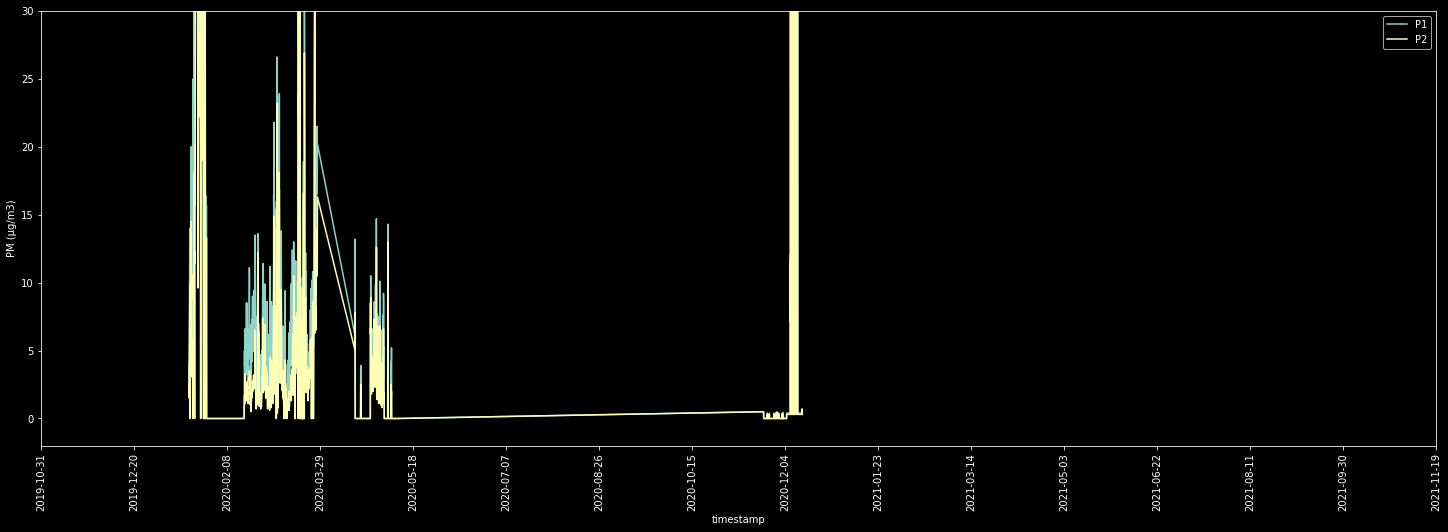

In [28]:
# Plot sensor data with the most 0-values 
plt.figure(figsize=(25, 8))
ax = sns.lineplot(data=df_sds.query("lat==50.08600 and lon==8.63400")[::100], x='timestamp', y='P1')
ax = sns.lineplot(data=df_sds.query("lat==50.08600 and lon==8.63400")[::100], x='timestamp', y='P2')
plt.xticks(range(18200, 19000, 50),rotation=90)
plt.ylabel('PM (µg/m3)')
plt.legend(['P1', 'P2'])
plt.ylim(-2, 30);

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


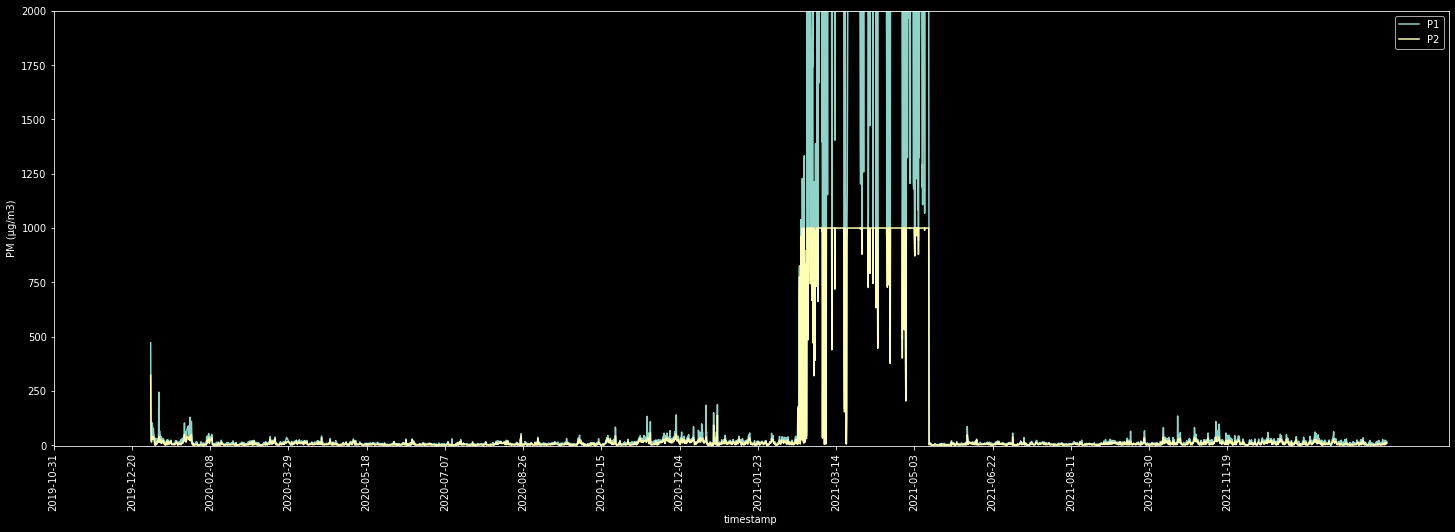

In [27]:
# Plot very high P1 and P2 values
plt.figure(figsize=(25, 8))
ax = sns.lineplot(data=df_sds.query("lat==50.132 and lon==8.626")[::100], x='timestamp', y='P1')
ax = sns.lineplot(data=df_sds.query("lat==50.132 and lon==8.626")[::100], x='timestamp', y='P2')
plt.legend()
plt.xticks(range(18200, 19000, 50),rotation=90)
plt.ylim(-2, 2000);
plt.ylabel('PM (µg/m3)')
plt.legend(['P1', 'P2'])

In [30]:
df_bmp280

,lat,lon,timestamp,pressure,temperature,hour,date
0,50.058,8.688,2020-10-31 16:00:00,100435.50,25.01,16,2020-10-31
1,50.058,8.688,2020-10-31 16:00:00,100429.72,25.40,16,2020-10-31
2,50.058,8.688,2020-10-31 17:00:00,100439.03,25.33,17,2020-10-31
3,50.058,8.688,2020-10-31 17:00:00,100439.91,25.33,17,2020-10-31
4,50.058,8.688,2020-10-31 17:00:00,100443.28,25.53,17,2020-10-31
...,...,...,...,...,...,...,...
396184,50.058,8.688,2021-01-31 23:00:00,97804.72,1.15,23,2021-01-31
396185,50.058,8.688,2021-01-31 23:00:00,98116.22,2.55,23,2021-01-31
396186,50.058,8.688,2021-01-31 23:00:00,98005.34,2.37,23,2021-01-31
396187,50.058,8.688,2021-01-31 23:00:00,98037.94,2.64,23,2021-01-31


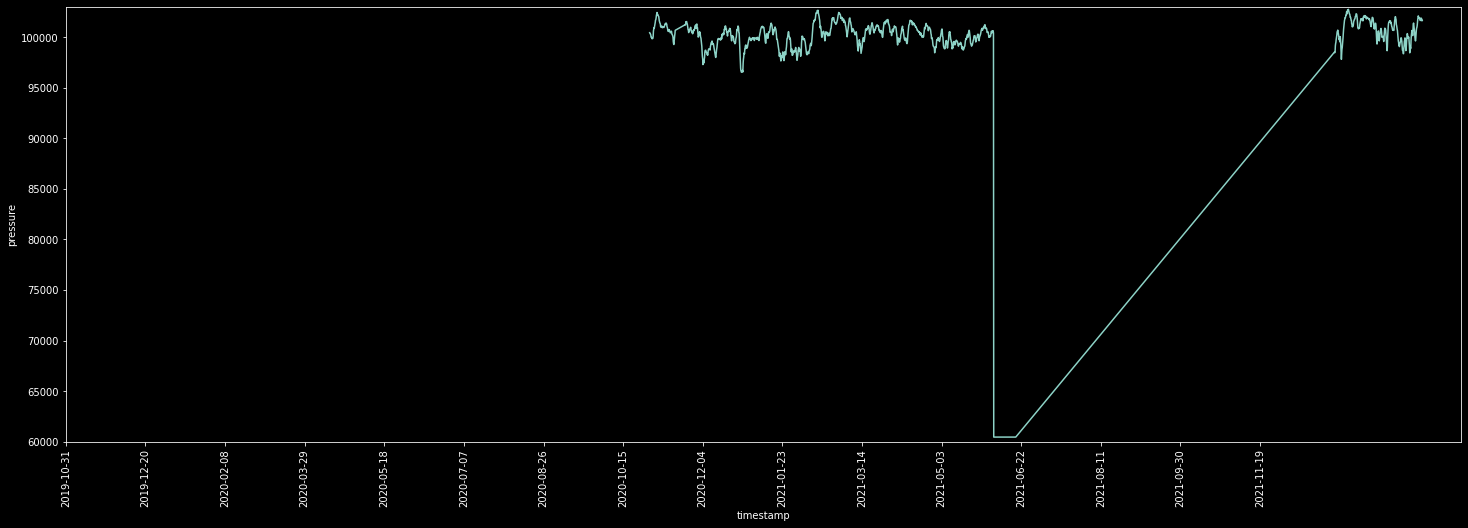

In [38]:
# Plot sensor data with the most 0-values 
plt.figure(figsize=(25, 8))
ax = sns.lineplot(data=df_bmp280.query("lat==50.058	 and lon==8.688")[::100], x='timestamp', y='pressure')
plt.xticks(range(18200, 19000, 50),rotation=90)
plt.ylim(60000, 103000);

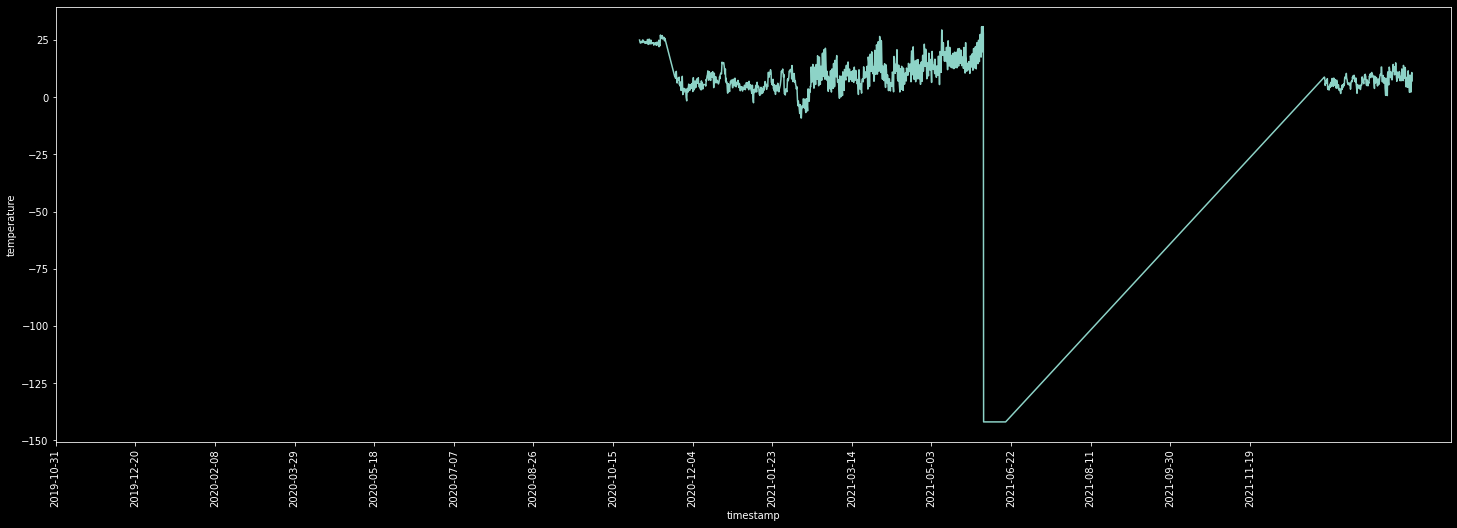

In [41]:
# Plot sensor data with the most 0-values 
plt.figure(figsize=(25, 8))
ax = sns.lineplot(data=df_bmp280.query("lat==50.058	 and lon==8.688")[::100], x='timestamp', y='temperature')
plt.xticks(range(18200, 19000, 50),rotation=90);
#plt.ylim(60000, 103000);

In [42]:
df_dht22

,lat,lon,timestamp,temperature,humidity,hour,date
0,53.070000,8.784000,2020-01-01 00:00:00,4.5,90.8,0,2020-01-01
1,53.080000,8.838000,2020-01-01 00:00:00,8.2,69.0,0,2020-01-01
2,53.082000,8.816000,2020-01-01 00:00:00,9.8,54.2,0,2020-01-01
3,53.073063,8.833028,2020-01-01 00:00:00,4.5,99.9,0,2020-01-01
4,53.080000,8.838000,2020-01-01 00:00:00,8.2,68.9,0,2020-01-01
...,...,...,...,...,...,...,...
30086022,50.124000,8.692000,2022-01-31 23:00:00,5.6,99.9,23,2022-01-31
30086023,50.150000,8.568000,2022-01-31 23:00:00,6.4,99.9,23,2022-01-31
30086024,50.084000,8.646000,2022-01-31 23:00:00,6.3,99.9,23,2022-01-31
30086025,50.108000,8.640000,2022-01-31 23:00:00,4.7,99.9,23,2022-01-31


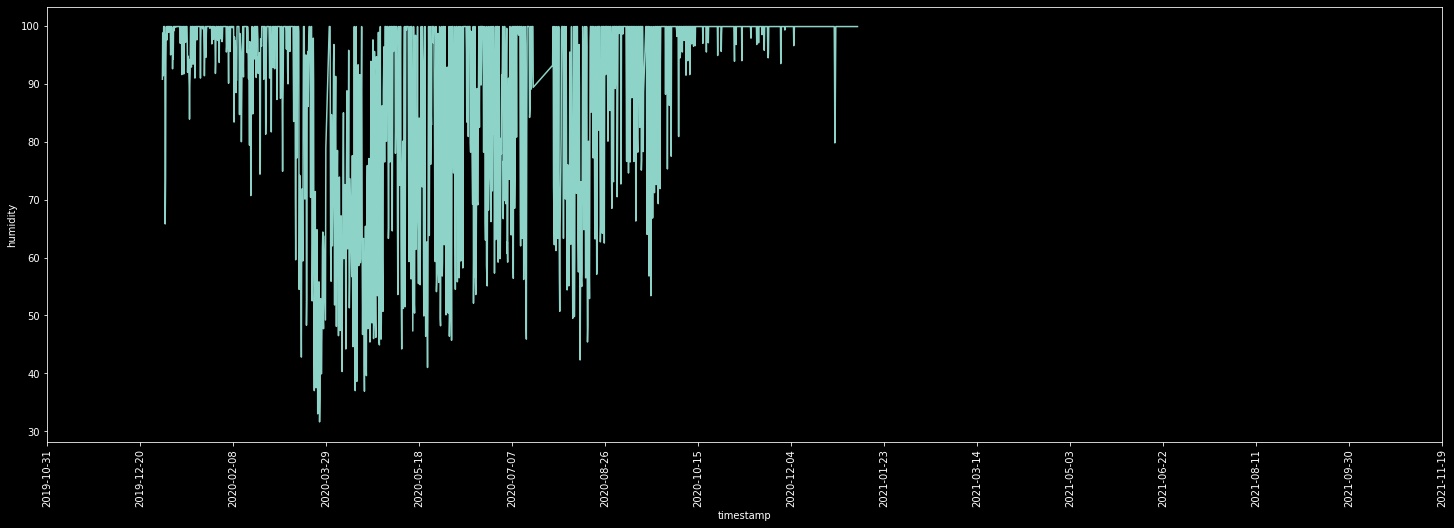

In [43]:
# Plot sensor data with the most 0-values 
plt.figure(figsize=(25, 8))
ax = sns.lineplot(data=df_dht22.query("lat==53.070000	 and lon==8.784000")[::100], x='timestamp', y='humidity')
plt.xticks(range(18200, 19000, 50),rotation=90);
#plt.ylim(60000, 103000);

# Preprocessing

In [63]:
# PM sensors
df_sds_grouped = df_sds.groupby(['hour', 'date', 'lat', 'lon', 'timestamp']).mean().reset_index() # mean
df_sds_grouped_std = df_sds.groupby(['hour', 'date', 'lat', 'lon', 'timestamp']).std().reset_index() # std
df_sds_grouped_std.rename(columns={'P1': 'PM10_std', 'P2': 'PM2p5_std'}, inplace=True)
df_sds_grouped.rename(columns={'P1': 'PM10', 'P2': 'PM2p5'}, inplace=True)

df_sds_merged = df_sds_grouped.merge(df_sds_grouped_std, how='left', on=['hour', 'date', 'lat', 'lon', 'timestamp'])
df_sds_merged

,hour,date,lat,lon,timestamp,PM10,PM2p5,PM10_std,PM2p5_std
0,0,2020-01-01,50.042000,8.436000,2020-01-01 00:00:00,212.110833,140.574167,24.278724,16.827501
1,0,2020-01-01,50.046000,8.852000,2020-01-01 00:00:00,627.256000,311.089200,62.521844,41.972714
2,0,2020-01-01,50.055659,8.692377,2020-01-01 00:00:00,305.763333,203.632500,114.922437,81.541566
3,0,2020-01-01,50.056000,8.506000,2020-01-01 00:00:00,177.833333,86.575000,32.063441,18.312198
4,0,2020-01-01,50.058000,8.688000,2020-01-01 00:00:00,96.024167,51.565833,60.892413,31.903331
...,...,...,...,...,...,...,...,...,...
1872414,23,2022-02-28,53.094000,8.800000,2022-02-28 23:00:00,30.930000,17.439167,2.525716,1.082826
1872415,23,2022-02-28,53.096000,8.802000,2022-02-28 23:00:00,49.369455,21.796909,2.883743,0.877165
1872416,23,2022-02-28,53.131823,8.732302,2022-02-28 23:00:00,29.000000,14.251818,2.167469,0.638940
1872417,23,2022-02-28,53.132000,8.708000,2022-02-28 23:00:00,5.765263,5.185789,0.447950,0.387317


In [46]:
df_environment = pd.concat([df_bme280, df_bmp280, df_dht22, df_bmp180, df_ds18b20], axis=0)
df_environment.head()

,lat,lon,timestamp,pressure,temperature,humidity,hour,date
0,53.094,8.800,2020-08-01 00:00:00,101480.41,19.33,100.00,0.0,2020-08-01
1,53.132,8.732,2020-08-01 00:00:00,101600.25,17.76,100.00,0.0,2020-08-01
2,53.140,8.904,2020-08-01 00:00:00,101612.34,17.83,77.67,0.0,2020-08-01
3,53.068,8.818,2020-08-01 00:00:00,101587.75,20.86,57.43,0.0,2020-08-01
4,53.094,8.800,2020-08-01 00:00:00,101479.69,19.22,100.00,0.0,2020-08-01


In [47]:
# std for only one value = NaN
df_environment.query("hour==0 and date=='2020-01-01' and lat==50.042000 and lon==8.436000")['temperature'].std()

nan

In [64]:
# environment sensors (humidity, temperature, air pressure)
df_environment_grouped = df_environment.groupby(['timestamp', 'hour', 'date', 'lat', 'lon']).mean().reset_index()
df_environment_grouped_std = df_environment.groupby(['timestamp', 'hour', 'date', 'lat', 'lon']).std().reset_index()

df_environment_grouped_std.rename(columns={'pressure': 'pressure_std', 'temperature': 'temperature_std', 'humidity': 'humidity_std'}, inplace=True)
df_environment_merged = df_environment_grouped.merge(df_environment_grouped_std, how='left', on=['timestamp', 'hour', 'date', 'lat', 'lon'])
df_environment_merged

,timestamp,hour,date,lat,lon,pressure,temperature,humidity,pressure_std,temperature_std,humidity_std
0,2020-01-01 00:00:00,0.0,2020-01-01,50.042000,8.436000,NaN,2.700000,96.000000,NaN,NaN,NaN
1,2020-01-01 00:00:00,0.0,2020-01-01,50.046000,8.852000,NaN,-0.536000,98.892000,NaN,0.111355,0.351094
2,2020-01-01 00:00:00,0.0,2020-01-01,50.055659,8.692377,NaN,-0.108333,99.900000,NaN,0.210417,0.000000
3,2020-01-01 00:00:00,0.0,2020-01-01,50.058000,8.688000,102132.965833,6.958333,53.087500,10.008531,0.067545,0.416280
4,2020-01-01 00:00:00,0.0,2020-01-01,50.070000,8.436000,NaN,1.432000,93.352000,NaN,0.124900,0.345350
...,...,...,...,...,...,...,...,...,...,...,...
1649017,2022-02-28 23:00:00,23.0,2022-02-28,53.094000,8.800000,103067.097083,2.551250,100.000000,5.860273,0.084971,0.000000
1649018,2022-02-28 23:00:00,23.0,2022-02-28,53.096000,8.802000,NaN,2.487273,99.900000,NaN,0.086184,0.000000
1649019,2022-02-28 23:00:00,23.0,2022-02-28,53.131823,8.732302,103027.205909,1.310000,100.000000,6.738443,0.102446,0.000000
1649020,2022-02-28 23:00:00,23.0,2022-02-28,53.132000,8.708000,NaN,22.594737,31.521053,NaN,0.077986,0.063060


In [65]:
df_environment_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1649022 entries, 0 to 1649021
Data columns (total 11 columns):
 #   Column           Non-Null Count    Dtype         
---  ------           --------------    -----         
 0   timestamp        1649022 non-null  datetime64[ns]
 1   hour             1649022 non-null  float64       
 2   date             1649022 non-null  datetime64[ns]
 3   lat              1649022 non-null  float64       
 4   lon              1649022 non-null  float64       
 5   pressure         382893 non-null   float64       
 6   temperature      1647886 non-null  float64       
 7   humidity         1634401 non-null  float64       
 8   pressure_std     381415 non-null   float64       
 9   temperature_std  1641863 non-null  float64       
 10  humidity_std     1628393 non-null  float64       
dtypes: datetime64[ns](2), float64(9)
memory usage: 151.0 MB


In [66]:
for col in df_environment_merged.columns:
    print(f"{col}: {df_environment_merged[col].isna().sum()}")

timestamp: 0
hour: 0
date: 0
lat: 0
lon: 0
pressure: 1266129
temperature: 1136
humidity: 14621
pressure_std: 1267607
temperature_std: 7159
humidity_std: 20629


In [67]:
df = df_sds_merged.merge(df_environment_merged, how='left', on=['timestamp', 'hour', 'date', 'lat', 'lon'])

,hour,date,lat,lon,timestamp,PM10,PM2p5,PM10_std,PM2p5_std,pressure,temperature,humidity,pressure_std,temperature_std,humidity_std
0,0,2020-01-01,50.042000,8.436000,2020-01-01 00:00:00,212.110833,140.574167,24.278724,16.827501,NaN,2.700000,96.000000,NaN,NaN,NaN
1,0,2020-01-01,50.046000,8.852000,2020-01-01 00:00:00,627.256000,311.089200,62.521844,41.972714,NaN,-0.536000,98.892000,NaN,0.111355,0.351094
2,0,2020-01-01,50.055659,8.692377,2020-01-01 00:00:00,305.763333,203.632500,114.922437,81.541566,NaN,-0.108333,99.900000,NaN,0.210417,0.000000
3,0,2020-01-01,50.056000,8.506000,2020-01-01 00:00:00,177.833333,86.575000,32.063441,18.312198,NaN,NaN,NaN,NaN,NaN,NaN
4,0,2020-01-01,50.058000,8.688000,2020-01-01 00:00:00,96.024167,51.565833,60.892413,31.903331,102132.965833,6.958333,53.087500,10.008531,0.067545,0.416280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1872414,23,2022-02-28,53.094000,8.800000,2022-02-28 23:00:00,30.930000,17.439167,2.525716,1.082826,103067.097083,2.551250,100.000000,5.860273,0.084971,0.000000
1872415,23,2022-02-28,53.096000,8.802000,2022-02-28 23:00:00,49.369455,21.796909,2.883743,0.877165,NaN,2.487273,99.900000,NaN,0.086184,0.000000
1872416,23,2022-02-28,53.131823,8.732302,2022-02-28 23:00:00,29.000000,14.251818,2.167469,0.638940,103027.205909,1.310000,100.000000,6.738443,0.102446,0.000000
1872417,23,2022-02-28,53.132000,8.708000,2022-02-28 23:00:00,5.765263,5.185789,0.447950,0.387317,NaN,22.594737,31.521053,NaN,0.077986,0.063060


In [ ]:
# add city column (Frankfurt, Bremen)
df['city'] = df.apply(lambda x: label_cities(x.lat, x.lon), axis=1)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1872419 entries, 0 to 1872418
Data columns (total 15 columns):
 #   Column           Dtype         
---  ------           -----         
 0   hour             int64         
 1   date             datetime64[ns]
 2   lat              float64       
 3   lon              float64       
 4   timestamp        datetime64[ns]
 5   PM10             float64       
 6   PM2p5            float64       
 7   PM10_std         float64       
 8   PM2p5_std        float64       
 9   pressure         float64       
 10  temperature      float64       
 11  humidity         float64       
 12  pressure_std     float64       
 13  temperature_std  float64       
 14  humidity_std     float64       
dtypes: datetime64[ns](2), float64(12), int64(1)
memory usage: 228.6 MB


In [69]:
df.to_csv('../data/processed_sensor_community.csv')